In [3]:
import tensorflow as tf

# Getting file names based on patterns
gcs_pattern = 'gs://thesis_data_hs/HAM10000_images/*.jpg'
filenames = tf.io.gfile.glob(gcs_pattern)

#['gs://flowers-public/tfrecords-jpeg-331x331/flowers00-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers01-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers02-230.tfrec',
#...

# Downloading the first file
for filename in filenames:
  origin = filename
  dest = origin.split("/")[-1]
  tf.io.gfile.copy(origin, dest, overwrite=True)

In [18]:
#import tensorflow as tf

# Getting file names based on patterns
gcs_pattern = 'gs://thesis_data_hs/ISIC2018_Task3_Test_Images/*.jpg'
filenames = tf.io.gfile.glob(gcs_pattern)

#['gs://flowers-public/tfrecords-jpeg-331x331/flowers00-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers01-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers02-230.tfrec',
#...

# Downloading the first file
for filename in filenames:
  origin = filename
  dest = '/tmp/test/' + origin.split("/")[-1]
  tf.io.gfile.copy(origin, dest, overwrite=True)

In [4]:
# Getting file names based on patterns
gcs_pattern = 'gs://thesis_data_hs/*.keras'
filenames = tf.io.gfile.glob(gcs_pattern)

#['gs://flowers-public/tfrecords-jpeg-331x331/flowers00-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers01-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers02-230.tfrec',
#...

# Downloading the first file
for filename in filenames:
  origin = filename
  dest = origin.split("/")[-1]
  tf.io.gfile.copy(origin, dest, overwrite=True)

In [5]:
# Getting file names based on patterns
gcs_pattern = 'gs://thesis_data_hs/*.npy'
filenames = tf.io.gfile.glob(gcs_pattern)

#['gs://flowers-public/tfrecords-jpeg-331x331/flowers00-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers01-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers02-230.tfrec',
#...

# Downloading the first file
for filename in filenames:
  origin = filename
  dest = origin.split("/")[-1]
  tf.io.gfile.copy(origin, dest, overwrite=True)

In [6]:
# Getting file names based on patterns
gcs_pattern = 'gs://thesis_data_hs/*.pkl'
filenames = tf.io.gfile.glob(gcs_pattern)

#['gs://flowers-public/tfrecords-jpeg-331x331/flowers00-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers01-230.tfrec',
# 'gs://flowers-public/tfrecords-jpeg-331x331/flowers02-230.tfrec',
#...

# Downloading the first file
for filename in filenames:
  origin = filename
  dest = '/tmp/' + origin.split("/")[-1]
  tf.io.gfile.copy(origin, dest, overwrite=True)

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from tensorflow.keras.applications import DenseNet121, VGG16, VGG19, ResNet50V2, Xception, InceptionV3, EfficientNetV2B3, InceptionResNetV2, MobileNetV2, MobileNetV3Small
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

In [19]:
test_meta_data = pd.read_csv('gs://thesis_data_hs/ISIC2018_Task3_Test_GroundTruth.csv')
test_meta_data = test_meta_data.drop_duplicates()
test_meta_data

image_path = '/tmp/test/'
test_meta_data['Image_path'] = test_meta_data['image_id'].apply(lambda x: os.path.join(image_path, f"{x}.jpg"))
test_meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Image_path
0,HAMTEST_0000000,ISIC_0034524,nv,follow_up,40.0,female,back,vidir_molemax,/tmp/test/ISIC_0034524.jpg
1,HAMTEST_0000001,ISIC_0034525,nv,histo,70.0,male,abdomen,rosendahl,/tmp/test/ISIC_0034525.jpg
2,HAMTEST_0000002,ISIC_0034526,bkl,histo,70.0,male,back,rosendahl,/tmp/test/ISIC_0034526.jpg
3,HAMTEST_0000003,ISIC_0034527,nv,histo,35.0,male,trunk,vienna_dias,/tmp/test/ISIC_0034527.jpg
4,HAMTEST_0000004,ISIC_0034528,nv,follow_up,75.0,female,trunk,vidir_molemax,/tmp/test/ISIC_0034528.jpg


In [8]:
#Get a look at the Data
meta_data=pd.read_csv('gs://thesis_data_hs/HAM10000_metadata')
meta_data = meta_data.drop_duplicates()
meta_data

#Path to the images
image_path=''
meta_data['Image_path'] = meta_data['image_id'].apply(lambda x: os.path.join(image_path, f"{x}.jpg"))
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,ISIC_0031633.jpg


In [9]:
#Encoding Labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

meta_data['label'] = label_encoder.fit_transform(meta_data['dx'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [20]:
test_meta_data['label'] = label_encoder.fit_transform(test_meta_data['dx'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [10]:
#Split the data into image path and labels, perform oversampling as needed
#At this stage of testing, I've found oversampling to lead to worse results,
#Only in cases when the oversampling is not significant, there could be potential improvement

X = meta_data.drop(columns=['label'])
y = meta_data['label']

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy={0:1000, 1:1500, 2:3000, 3:350, 4:3300, 5:6705, 6:450})

X_over, y_over = oversample.fit_resample(X, y)

In [21]:
X_test_real = test_meta_data.drop(columns=['label'])
y_test_real = test_meta_data['label']

In [11]:
# Separate features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

In [12]:
print("New class distribution:", np.bincount(y_train))

New class distribution: [ 730 1120 2270  256 2519 5002  331]


In [13]:
#Image Augmentation Step. Also includes preprocessing according to type of pre-trained model being used
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    brightness_range=[0.5, 1.5],
    channel_shift_range=20,
    #rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=15,
    zoom_range=0,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function = preprocess_input
)
test_datagen = ImageDataGenerator(#rescale=1./255,
    preprocessing_function = preprocess_input
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='dx',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    #save_to_dir='/tmp/',
    validate_filenames=True
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='dx',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    #save_to_dir='thesis_data_hs/augmented',
    validate_filenames=True
)

Found 12228 validated image filenames belonging to 7 classes.
Found 4077 validated image filenames belonging to 7 classes.


In [23]:
test_real_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test_real,
    x_col='Image_path',
    y_col='dx',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    #save_to_dir='thesis_data_hs/augmented',
    validate_filenames=True
)

Found 1510 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="Image_path". These filename(s) will be ignored.
  warnings.warn(


In [14]:
train_gene_test = train_datagen.flow_from_directory(
    directory='/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=1,
    shuffle=False,
    seed=None,
    save_to_dir='/tmp/',
    save_prefix='test1',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)


Found 12712 images belonging to 25 classes.


In [21]:
#Sanity check for some generated augmented images
total = 0
for image in train_gene_test:
    total += 1
    #print(image.class_indices)
    #print(image)
    if total > 31:
        break

In [14]:
#Testing class_weight changes as opposed to synthetic oversampling methods.
#Did not seem to have positive effects when perfectly balancing but maybe need to adjust weights
#from sklearn.utils import class_weight
#import numpy as np

#class_weights = class_weight.compute_class_weight(
#           class_weight='balanced',
#            classes=np.unique(train_generator.classes),
#            y=train_generator.classes)

#train_class_weights = dict(enumerate(class_weights))
#manual_train_class_weights = {0: 12.66,
#                              1: 6.33,
#                              2: 3,
#                              3: 12.66,
#                              4: 6.33,
#                              5: 2.71,
#                              6: 12.66}
#print(train_class_weights)

In [15]:
#Various Pre-trained Models. All imported without the 'top' dense layers at the end and same input shapes
#Their layers are set to not trainable so that only additional layers added on top are trained
#base_model_densenet = DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_mobilenet = MobileNetV2(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_mobilenetV3 = MobileNetV3Small(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

#base_model_efficientnet = EfficientNetV2B3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_vgg19 = VGG19(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_resnet50 = ResNet50V2(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_inception = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_xception = Xception(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
#base_model_inceptresnet = InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

#for layer in base_model_efficientnet.layers:
#    layer.trainable = False

#for layer in base_model_vgg19.layers:
#    layer.trainable = False

#for layer in base_model_resnet50.layers:
#    layer.trainable = False

#for layer in base_model_inception.layers:
#    layer.trainable = False

#for layer in base_model_inceptresnet.layers:
#    layer.trainable = False

#base_model_mobilenet.trainable = False
#base_model_mobilenetV3.trainable = False
#base_model_densenet.trainable = False
#base_model_xception.trainable = False

In [16]:
#base_model_inception.trainable = False

In [17]:
#base_model_vgg19.output.shape

In [18]:
#Implementation of the additional model layers to adjust for expected outputs
#training=False
#from keras import Input
#inputs = Input(shape=(224, 224, 3))
#x = base_model_inception(inputs, training=False)
#x = BatchNormalization()(x)
#x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.25)(x)
#x = Flatten()(x)
#x = Dense(512, activation='relu', kernel_initializer='he_normal') (x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#predictions = Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform')(x)
#x = GlobalAveragePooling2D()(x)
#x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
#predictions =  Dense(7, activation='softmax')(x)
#x = GlobalAveragePooling2D()(x)
#x = BatchNormalization()(x)
#x = Dense(1024, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
#x = Dropout(0.5)(x)
#predictions =  Dense(7, activation='softmax')(x)
#model = Model(inputs=inputs, outputs=predictions)

In [19]:
#Model settings related to optimiser, metrics focus, learning rate reduction, model saving and early stopping
#from keras.optimizers import Adam
#import keras.metrics
# Specify the learning rate
#learning_rate = 0.001

# Create the Adam optimizer with the specified learning rate
#adam_optimizer = Adam(learning_rate=learning_rate)

#f1_score = 2 * (keras.metrics.Precision() * keras.metrics.Recall()) / (keras.metrics.Precision() + keras.metrics.Recall())

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
#checkpoint = ModelCheckpoint(filepath='/tmp/model_weights_inception.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='accuracy', mode='max', factor=0.5, patience=3, verbose=1)
#early_stopping = EarlyStopping(monitor='accuracy', mode='max',patience=10, restore_best_weights=True, verbose=1)

In [1]:
#!pip install 'tensorflow<=2.16.0'
#import tensorflow as tf
#tf.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [33]:
#Loading previous;y trained models if need be
model = tf.keras.models.load_model('model_weights_densenet.keras')

In [31]:
#model = tf.keras.models.load_model('model_weights_inception.keras')

In [ ]:
#Confirming that a GPU is in fact available before starting training
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#tf.device('/gpu:0')

In [ ]:
# Training the model
#history=model.fit(
    #x=X_train_resampled,
    #y=y_train_resampled,
#    train_generator,
#    batch_size = 32,
#    epochs=100,
#    validation_data=test_generator,
    #class_weight = manual_train_class_weights,
#    callbacks=[checkpoint, reduce_lr, early_stopping]
#)

In [ ]:
#Saving model under a different name if needed
#model.save('model_weights_mobilenet_best.keras')

48/48 [==============================] - 132s 3s/step


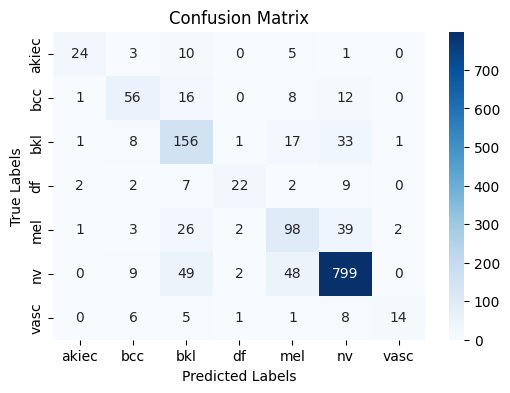

Accuracy: 0.7742
Precision: 0.7832
Recall: 0.7742
F1-Score: 0.7742
AUC: 0.9391
Confusion Matrix: [[ 24   3  10   0   5   1   0]
 [  1  56  16   0   8  12   0]
 [  1   8 156   1  17  33   1]
 [  2   2   7  22   2   9   0]
 [  1   3  26   2  98  39   2]
 [  0   9  49   2  48 799   0]
 [  0   6   5   1   1   8  14]]
MCM: [[[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]

 [[1510    0]
  [   0    0]]]
MCC: 0.6230
              precision    recall  f1-score   support

       akiec       0.83      0.56      0.67        43
         bcc       0.64      0.60      0.62        93
         bkl       0.58      0.72      0.64       217
          df       0.79      0.50      0.61        44
         mel       0.55      0.57      0.56       171
          nv       0.89      0.88      0.88       907
        vasc       0.82      0.40      0.54        35

    accuracy            

NameError: name 'metrics' is not defined

In [34]:
#Printing out key metrics and results - Confusion Matrix, Accuracy, Recall, Precision, etc.
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, precision_recall_fscore_support

# Predictions
predictions = model.predict(test_real_generator, steps=len(test_real_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_real_generator.classes
class_labels = list(test_real_generator.class_indices.keys())

accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys()), output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
#sensitivity = report['macro avg']['sensitivity']
#specificity = report['macro avg']['specificity']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
mcm = multilabel_confusion_matrix(true_classes, predicted_classes, labels=list(test_generator.class_indices.keys()))

mcc = matthews_corrcoef(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Confusion Matrix: {cm}")
print(f"MCM: {mcm}")
print(f"MCC: {mcc:.4f}")
print(classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))

fpr, tpr, thresholds = metrics.roc_curve(true_classes, predicted_classes)

roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')

In [ ]:
# Plot training history for various metrics, primarily loss and accuracy
#tr_acc = history.history['accuracy']
#tr_loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']

#epochs = range(1, len(tr_acc) + 1)

#plt.figure(figsize=(14, 5))

#plt.subplot(1, 2, 1)
#plt.plot(epochs, tr_loss, 'r', label='Train Loss')
#plt.plot(epochs, val_loss, 'g', label='Validation Loss')
#plt.title('Loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.subplot(1, 2, 2)
#plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
#plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
#plt.title('Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()

#plt.tight_layout()
#plt.show()

In [ ]:
#for layer in model.layers:
#  layer.trainable = True
#for layer in model.layers:
#  if layer.trainable:
#    print(f"{layer.name} is trainable")
#  else:
#      print(f"{layer.name} is not trainable")
#base_model_mobilenetV3.trainable = True

In [ ]:
#Fine Tuning Step (Fitting some of the pre-trained model)
#for layer in base_model_mobilenet.layers:
#    layer.trainable = True

#model.compile(
#    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
#    loss='categorical_crossentropy',
#    metrics=['accuracy']
#)

################

#checkpoint = ModelCheckpoint(filepath='/tmp/model_weights_mobilenetV3_finetuned.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='accuracy', mode='max', factor=0.5, patience=3, verbose=1)
#early_stopping = EarlyStopping(monitor='accuracy', mode='max',patience=10, restore_best_weights=True, verbose=1)


#model.fit(train_generator,
#    batch_size = 32,
#    epochs=10,
#    validation_data=test_generator,
    #class_weight = manual_train_class_weights,
#    callbacks=[checkpoint, reduce_lr, early_stopping]
#)

In [ ]:
#model.save('/tmp/model_weights_mobilenetV3.keras')

In [ ]:
#Sequential Model 1
model_scratch_1 = Sequential([
        # Convolutional layers
        Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3), padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        Convolution2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        Convolution2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        Convolution2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Flatten and dense layers
        Flatten(),
        Dropout(rate=0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        BatchNormalization(),
        # Output layer
        Dense(7, activation='softmax')
    ])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#checkpoint = ModelCheckpoint(filepath='model_weights_sequential1_oversampled_acc.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='accuracy', mode='max', factor=0.5, patience=3, verbose=1)
#early_stopping = EarlyStopping(monitor='accuracy', mode='max',patience=10, restore_best_weights=True, verbose=1)

In [ ]:
#Sequential Model 2
model_scratch = Sequential([
    Convolution2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Convolution2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization() ,
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Convolution2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Convolution2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Convolution2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Convolution2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform')
])

#model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#checkpoint = ModelCheckpoint(filepath='model_weights_sequential2_oversampled_acc.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.5, patience=3, verbose=1)
#early_stopping = EarlyStopping(monitor='val_accuracy', mode='max',patience=10, restore_best_weights=True, verbose=1)

In [ ]:
#Sequential Model 3
#model = Sequential()
#model.add(Convolution2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
#model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(7, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#checkpoint = ModelCheckpoint(filepath='model_weights_sequential3_oversampled_acc.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)
#reduce_lr = ReduceLROnPlateau(monitor='accuracy', mode='max', factor=0.5, patience=3, verbose=1)
#early_stopping = EarlyStopping(monitor='accuracy', mode='max',patience=10, restore_best_weights=True, verbose=1)

In [ ]:
#Ensemble Method Initial
#from sklearn.ensemble import VotingClassifier

#ensemble_model = VotingClassifier(
#    estimators=[
#        ('cnn', cnn_model),
#        ('lr', lr_model),
#        ('rf', rf_model),
#       ('svc', svc_model)
#    ],
#    voting='soft'  # Use soft voting to average predicted probabilities
#)

In [35]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
#model.summary()

In [36]:
import shap

In [37]:
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(224,224)", (224,224,3))
explainer = shap.Explainer(f, masker_blur, output_names=list(range(7)))

In [38]:
!pip install quantus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 6.0 MB/s eta 0:00:00


In [39]:
import quantus

In [ ]:
#for image in test_generator:
#    test_image = image
#    total = 1

#    if total > 0:
#        break
#x_batch = test_image[0]
#y_batch = test_image[1]
#x_batch.shape
#shap_values_3000 = explainer(test_image[0], max_evals=3000, batch_size=32 )
#shap.image_plot(shap_values=shap_values_, labels=[0,1,2,3,4,5,6])
#print(model.predict(test_image[0]))
#print(test_image[1])

In [ ]:
#y_batch = np.argmax(y_batch, axis=1)

In [ ]:
#quantus.FaithfulnessCorrelation(
#    nr_runs=100,
#    subset_size=224,
#    perturb_baseline="black",
#    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
#    similarity_func=quantus.similarity_func.correlation_pearson,
#    abs=False,
#    return_aggregate=False,
#)(model=model,
#   x_batch=shap_values_1000.data,
#   y_batch=y_batch,
#   a_batch=shap_values_1000.values,
#  channel_first=True)

In [ ]:
#shap_values_1000 = explainer(test_image[0], max_evals=1000, batch_size=32 )

In [40]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255313 sha256=d88786c9064c0b3362c0d67abadd78f45fbb3147c86d00e5550e48cfe08a82fc
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
#import pickle
#with open('/tmp/shap_values_1000.pkl', 'wb') as file1:
#    # A new file will be created
#    pickle.dump(shap_values_1000, file1)

#with open('/tmp/shap_values_2000.pkl', 'wb') as file2:
#    # A new file will be created
#    pickle.dump(shap_values_2000, file2)

#with open('/tmp/shap_values_3000.pkl', 'wb') as file3:
#    # A new file will be created
#    pickle.dump(shap_values_3000, file3)

#with open('/tmp/shap_values_4000.pkl', 'wb') as file4:
#    # A new file will be created
#    pickle.dump(shap_values_4000, file4)

#with open('/tmp/shap_values_5000.pkl', 'wb') as file5:
#    # A new file will be created
#    pickle.dump(shap_values_5000, file5)

In [41]:
import pickle
file = open('/tmp/shap_values_4000(1).pkl', 'rb')
shap_values_4000 = pickle.load(file)
file.close()
file = open('/tmp/shap_values_3000(1).pkl', 'rb')
shap_values_3000 = pickle.load(file)
file.close()
file = open('/tmp/shap_values_2000(1).pkl', 'rb')
shap_values_2000 = pickle.load(file)
file.close()
file = open('/tmp/shap_values_1000(1).pkl', 'rb')
shap_values_1000 = pickle.load(file)
file.close()
file = open('/tmp/shap_values_5000(1).pkl', 'rb')
shap_values_5000 = pickle.load(file)
file.close()

In [ ]:
#from google.colab import files
#files.download('/tmp/shap_values_1000.pkl')
#files.download('/tmp/shap_values_2000.pkl')
#files.download('/tmp/shap_values_3000.pkl')
#files.download('/tmp/shap_values_4000.pkl')
#files.download('/tmp/shap_values_5000.pkl')

In [ ]:
#np.save('/tmp/shap_values_1000', shap_values_1000)
#np.save('/tmp/shap_values_3000', shap_values_3000)
#np.save('/tmp/shap_values_5000', shap_values_5000)
#np.save('/tmp/x_batch', x_batch)
#np.save('/tmp/y_batch', y_batch)

In [42]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d32ea78f5584099cc33b4fd12439e2b21f7132c0e0cdca47b525ce20c660f106
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [43]:
import lime

In [44]:
from lime import lime_image
explainer_lime = lime_image.LimeImageExplainer()

In [45]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [161]:
from keras.preprocessing import image
images = transform_img_fn(meta_data['Image_path'][3000:3032])

In [75]:
meta_data['Image_path'][:32]

,Image_path
0,ISIC_0027419.jpg
1,ISIC_0025030.jpg
2,ISIC_0026769.jpg
3,ISIC_0025661.jpg
4,ISIC_0031633.jpg
5,ISIC_0027850.jpg
6,ISIC_0029176.jpg
7,ISIC_0029068.jpg
8,ISIC_0025837.jpg
9,ISIC_0025209.jpg


In [167]:
explanation_lime_1000 = []
for i in range(32):
  explanation_lime_1000.append(explainer_lime.explain_instance(images[i].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 748ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 772ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 742ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 793ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 762ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 728ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 750ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 718ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 722ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 716ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 723ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 714ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 711ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 714ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 707ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 731ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 719ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 713ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 738ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 763ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 768ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 736ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 796ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 736ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 734ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 734ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 731ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 732ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 717ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 721ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 720ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 732ms/step


In [ ]:
#np.save('/tmp/explanation_lime_1000', explanation_lime_1000)

In [69]:
explanation_lime_500 = np.load('explanation_lime_500.npy', allow_pickle=True)
explanation_lime_1000 = np.load('explanation_lime_1000.npy', allow_pickle=True)
explanation_lime_2000 = np.load('explanation_lime_2000.npy', allow_pickle=True)
explanation_lime_3000 = np.load('explanation_lime_3000.npy', allow_pickle=True)

In [46]:
x_batch = np.load('x_batch.npy')
y_batch = np.load('y_batch.npy')

In [ ]:
#for i in range(32):
#  for j in range(224):
#    for k in range(224):
#      for l in range(3):
#        shap_values_1000.values[i][j][k][l] = shap_values_1000.values[i][j][k][l][y_batch[i]]

In [47]:
!pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00


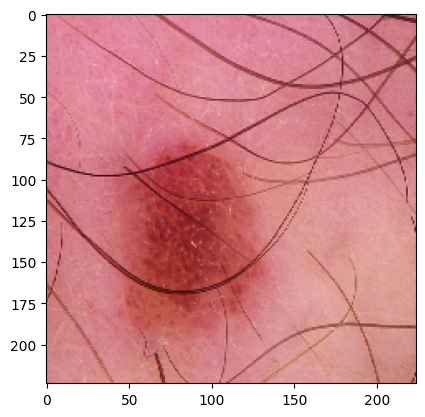

In [165]:
img = image.load_img(meta_data['Image_path'][3001], target_size=(224, 224))
plt.imshow(img)

In [166]:
from skimage.segmentation import mark_boundaries
from keras.preprocessing import image

temp, mask = explanation_lime_1000[1].get_image_and_mask(explanation_lime_1000[1].top_labels[0], positive_only=True, num_features=10000000000, hide_rest=True)
img = image.load_img(meta_data['Image_path'][3001], target_size=(224, 224))
plt.imshow(img)
plt.imshow(mark_boundaries(temp, mask))
meta_data['label'][3001]
#model.predict(meta_data['Image_path'][0])

IndexError: list index out of range

In [160]:
meta_data['label'][3000:3832]

,label
3000,5
3001,5
3002,5
3003,5
3004,5
3005,5
3006,5
3007,5
3008,5
3009,5


In [48]:
import matplotlib.pyplot as plt
from scipy import ndimage
from IPython.display import Image, display

In [49]:
img_size = (224,224,3)

In [50]:
def get_img_array(img_path, size=(224, 224)):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    interpolated_image = preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):
    """Generates a number of random baseline images.

    Args:
        img_input (ndarray): 3D image
        top_pred_idx: Predicted label for the input image
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.
        num_runs: number of baseline images to generate

    Returns:
        Averaged integrated gradients for `num_runs` baseline images
    """
    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)


In [51]:
class GradVisualizer:
    """Plot gradients of the outputs w.r.t an input image."""

    def __init__(self, positive_channel=None, negative_channel=None):
        if positive_channel is None:
            self.positive_channel = [0, 255, 0]
        else:
            self.positive_channel = positive_channel

        if negative_channel is None:
            self.negative_channel = [255, 0, 0]
        else:
            self.negative_channel = negative_channel

    def apply_polarity(self, attributions, polarity):
        if polarity == "positive":
            return np.clip(attributions, 0, 1)
        else:
            return np.clip(attributions, -1, 0)

    def apply_linear_transformation(
        self,
        attributions,
        clip_above_percentile=99.9,
        clip_below_percentile=70.0,
        lower_end=0.2,
    ):
        # 1. Get the thresholds
        m = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_above_percentile
        )
        e = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_below_percentile
        )

        # 2. Transform the attributions by a linear function f(x) = a*x + b such that
        # f(m) = 1.0 and f(e) = lower_end
        transformed_attributions = (1 - lower_end) * (np.abs(attributions) - e) / (
            m - e
        ) + lower_end

        # 3. Make sure that the sign of transformed attributions is the same as original attributions
        transformed_attributions *= np.sign(attributions)

        # 4. Only keep values that are bigger than the lower_end
        transformed_attributions *= transformed_attributions >= lower_end

        # 5. Clip values and return
        transformed_attributions = np.clip(transformed_attributions, 0.0, 1.0)
        return transformed_attributions

    def get_thresholded_attributions(self, attributions, percentage):
        if percentage == 100.0:
            return np.min(attributions)

        # 1. Flatten the attributions
        flatten_attr = attributions.flatten()

        # 2. Get the sum of the attributions
        total = np.sum(flatten_attr)

        # 3. Sort the attributions from largest to smallest.
        sorted_attributions = np.sort(np.abs(flatten_attr))[::-1]

        # 4. Calculate the percentage of the total sum that each attribution
        # and the values about it contribute.
        cum_sum = 100.0 * np.cumsum(sorted_attributions) / total

        # 5. Threshold the attributions by the percentage
        indices_to_consider = np.where(cum_sum >= percentage)[0][0]

        # 6. Select the desired attributions and return
        attributions = sorted_attributions[indices_to_consider]
        return attributions

    def binarize(self, attributions, threshold=0.001):
        return attributions > threshold

    def morphological_cleanup_fn(self, attributions, structure=np.ones((4, 4))):
        closed = ndimage.grey_closing(attributions, structure=structure)
        opened = ndimage.grey_opening(closed, structure=structure)
        return opened

    def draw_outlines(
        self,
        attributions,
        percentage=90,
        connected_component_structure=np.ones((3, 3)),
    ):
        # 1. Binarize the attributions.
        attributions = self.binarize(attributions)

        # 2. Fill the gaps
        attributions = ndimage.binary_fill_holes(attributions)

        # 3. Compute connected components
        connected_components, num_comp = ndimage.label(
            attributions, structure=connected_component_structure
        )

        # 4. Sum up the attributions for each component
        total = np.sum(attributions[connected_components > 0])
        component_sums = []
        for comp in range(1, num_comp + 1):
            mask = connected_components == comp
            component_sum = np.sum(attributions[mask])
            component_sums.append((component_sum, mask))

        # 5. Compute the percentage of top components to keep
        sorted_sums_and_masks = sorted(component_sums, key=lambda x: x[0], reverse=True)
        sorted_sums = list(zip(*sorted_sums_and_masks))[0]
        cumulative_sorted_sums = np.cumsum(sorted_sums)
        cutoff_threshold = percentage * total / 100
        cutoff_idx = np.where(cumulative_sorted_sums >= cutoff_threshold)[0][0]
        if cutoff_idx > 2:
            cutoff_idx = 2

        # 6. Set the values for the kept components
        border_mask = np.zeros_like(attributions)
        for i in range(cutoff_idx + 1):
            border_mask[sorted_sums_and_masks[i][1]] = 1

        # 7. Make the mask hollow and show only the border
        eroded_mask = ndimage.binary_erosion(border_mask, iterations=1)
        border_mask[eroded_mask] = 0

        # 8. Return the outlined mask
        return border_mask

    def process_grads(
        self,
        image,
        attributions,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
    ):
        if polarity not in ["positive", "negative"]:
            raise ValueError(
                f""" Allowed polarity values: 'positive' or 'negative'
                                    but provided {polarity}"""
            )
        if clip_above_percentile < 0 or clip_above_percentile > 100:
            raise ValueError("clip_above_percentile must be in [0, 100]")

        if clip_below_percentile < 0 or clip_below_percentile > 100:
            raise ValueError("clip_below_percentile must be in [0, 100]")

        # 1. Apply polarity
        if polarity == "positive":
            attributions = self.apply_polarity(attributions, polarity=polarity)
            channel = self.positive_channel
        else:
            attributions = self.apply_polarity(attributions, polarity=polarity)
            attributions = np.abs(attributions)
            channel = self.negative_channel

        # 2. Take average over the channels
        attributions = np.average(attributions, axis=2)

        # 3. Apply linear transformation to the attributions
        attributions = self.apply_linear_transformation(
            attributions,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            lower_end=0.0,
        )

        # 4. Cleanup
        if morphological_cleanup:
            attributions = self.morphological_cleanup_fn(
                attributions, structure=structure
            )
        # 5. Draw the outlines
        if outlines:
            attributions = self.draw_outlines(
                attributions, percentage=outlines_component_percentage
            )

        # 6. Expand the channel axis and convert to RGB
        attributions = np.expand_dims(attributions, 2) * channel

        # 7.Superimpose on the original image
        if overlay:
            attributions = np.clip((attributions * 0.8 + image), 0, 255)
        return attributions

    def visualize(
        self,
        image,
        gradients,
        integrated_gradients,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
        figsize=(15, 8),
    ):
        # 1. Make two copies of the original image
        img1 = np.copy(image)
        img2 = np.copy(image)

        # 2. Process the normal gradients
        grads_attr = self.process_grads(
            image=img1,
            attributions=gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        # 3. Process the integrated gradients
        igrads_attr = self.process_grads(
            image=img2,
            attributions=integrated_gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        _, ax = plt.subplots(1, 3, figsize=figsize)
        ax[0].imshow(image)
        ax[1].imshow(grads_attr.astype(np.uint8))
        ax[2].imshow(igrads_attr.astype(np.uint8))

        ax[0].set_title("Input")
        ax[1].set_title("Normal gradients")
        ax[2].set_title("Integrated gradients")
        plt.show()


In [ ]:
#grads_batch_20_20 = []
#igrads_batch_20_20 = []
#for i in range(32):
#  a = np.expand_dims(x_batch[i],axis=0)
#  grads = get_gradients(a, top_pred_idx=y_batch[i])

  # 6. Get the integrated gradients
#  igrads = random_baseline_integrated_gradients(
#      x_batch[i], top_pred_idx=y_batch[i], num_steps=20, num_runs=20
#  )
#  grads_batch_20_20.append(grads)
#  igrads_batch_20_20.append(igrads)

In [ ]:
#with open('/tmp/intgrad_20_20.pkl', 'wb') as file1:
#    # A new file will be created
#    pickle.dump(igrads_batch_20_20, file1)
#from google.colab import files
#files.download('/tmp/intgrad_20_20.pkl')

In [ ]:
#grads_batch_50_10 = []
#igrads_batch_50_10 = []
#for i in range(32):
#  a = np.expand_dims(x_batch[i],axis=0)
#  grads = get_gradients(a, top_pred_idx=y_batch[i])

  # 6. Get the integrated gradients
  #igrads = random_baseline_integrated_gradients(
  #    x_batch[i], top_pred_idx=y_batch[i], num_steps=50, num_runs=10
  #)
  #grads_batch_50_10.append(grads)
  #igrads_batch_50_10.append(igrads)

In [ ]:
#with open('/tmp/intgrad_50_10.pkl', 'wb') as file1:
#    # A new file will be created
#    pickle.dump(igrads_batch_50_10, file1)
#from google.colab import files
#files.download('/tmp/intgrad_50_10.pkl')

In [ ]:
#grads_batch_80_10 = []
#igrads_batch_80_10 = []
#for i in range(32):
#  a = np.expand_dims(x_batch[i],axis=0)
#  grads = get_gradients(a, top_pred_idx=y_batch[i])

  # 6. Get the integrated gradients
#  igrads = random_baseline_integrated_gradients(
#      x_batch[i], top_pred_idx=y_batch[i], num_steps=80, num_runs=10
#  )
#  grads_batch_80_10.append(grads)
#  igrads_batch_80_10.append(igrads)
#  print(i)

In [ ]:
#with open('/tmp/intgrad_80_10.pkl', 'wb') as file1:
#    # A new file will be created
#    pickle.dump(igrads_batch_80_10, file1)
#from google.colab import files
#files.download('/tmp/intgrad_80_10.pkl')

In [ ]:
#grads_batch_300 = []
#igrads_batch_300 = []
#for i in range(32):
#  a = np.expand_dims(x_batch[i],axis=0)
#  grads = get_gradients(a, top_pred_idx=y_batch[i])

  # 6. Get the integrated gradients
#  igrads = random_baseline_integrated_gradients(
#      x_batch[i], top_pred_idx=y_batch[i], num_steps=300, num_runs=5
#  )
#  grads_batch_300.append(grads)
#  igrads_batch_300.append(igrads)
#  print(i)

In [ ]:
#with open('/tmp/intgrad_300.pkl', 'wb') as file1:
    # A new file will be created
#    pickle.dump(igrads_batch_300, file1)
#from google.colab import files
#files.download('/tmp/intgrad_300.pkl')

In [248]:
grads_batch_500 = []
igrads_batch_500 = []
for i in range(32):
  a = np.expand_dims(x_batch[i],axis=0)
  grads = get_gradients(a, top_pred_idx=y_batch[i])

  # 6. Get the integrated gradients
#  igrads = random_baseline_integrated_gradients(
#      x_batch[i], top_pred_idx=y_batch[i], num_steps=500, num_runs=2
#  )
  grads_batch_500.append(grads)
#  igrads_batch_500.append(igrads)
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [193]:
grads_batch_500.shape

AttributeError: 'list' object has no attribute 'shape'

In [202]:
intgrad_80[0].shape

TensorShape([224, 224, 3])

In [252]:
b = grads_batch_500
#for i in range(32):
#  b[i] = b[i].numpy()
b = np.array(b)

In [288]:
a_test = intgrad_20_20
for i in range(32):
  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)

In [191]:
grads_batch_500.shape

(32, 1, 224, 224, 3)

In [ ]:
#with open('/tmp/intgrad_500.pkl', 'wb') as file1:
#    # A new file will be created
#    pickle.dump(igrads_batch_500, file1)
#from google.colab import files
#files.download('/tmp/intgrad_500.pkl')

In [221]:
y_batch

array([0, 2, 1, 3, 0, 5, 2, 5, 1, 4, 5, 5, 5, 5, 2, 5, 5, 1, 0, 3, 5, 0,
       5, 4, 4, 1, 6, 2, 1, 2, 5, 5])

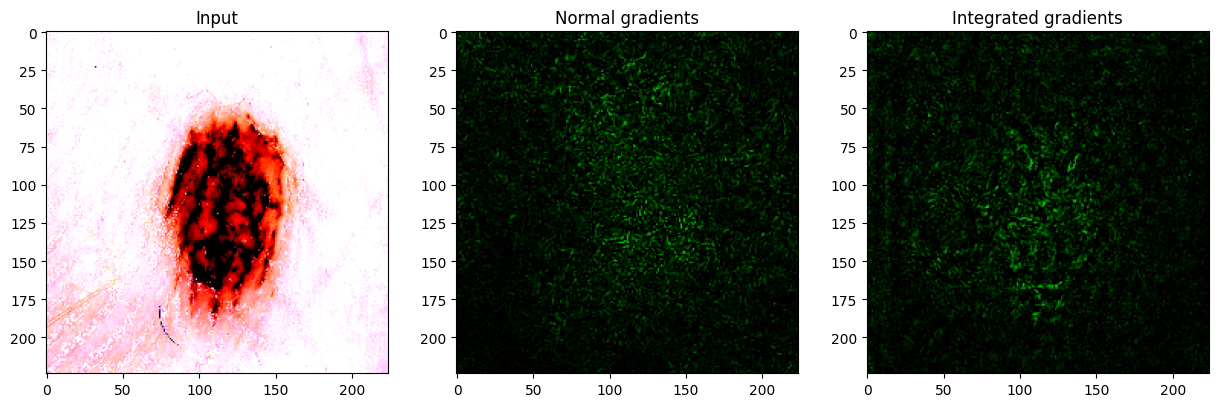

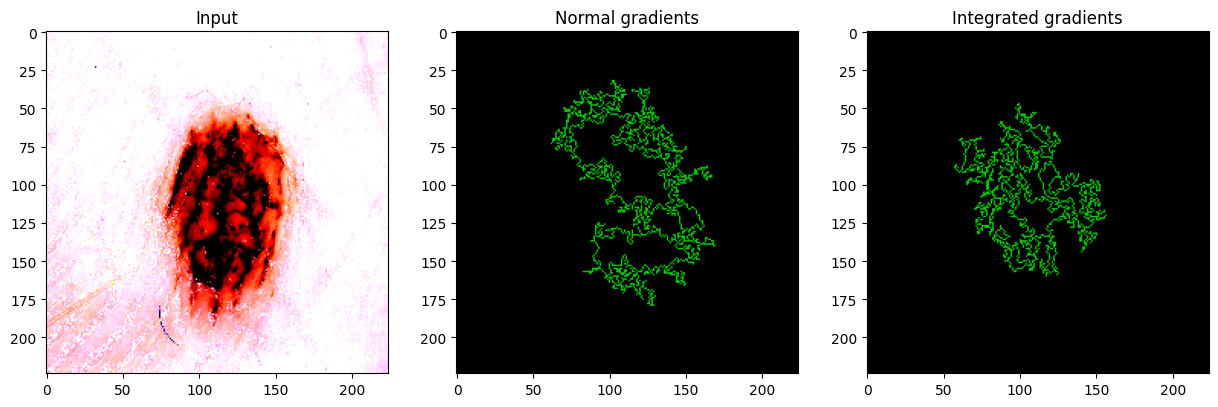

In [325]:
i = 13
vis = GradVisualizer()
vis.visualize(
    image=x_batch[i],
    gradients=b[i][0],
    integrated_gradients=a_test[i],
    clip_above_percentile=99,
    clip_below_percentile=0,
)

vis.visualize(
    image=x_batch[i],
    gradients=b[i][0],
    integrated_gradients=a_test[i],
    clip_above_percentile=95,
    clip_below_percentile=28,
    morphological_cleanup=False,
    outlines=True,
)

In [52]:
import pickle
file = open('/tmp/intgrad_150.pkl', 'rb')
intgrad_150 = pickle.load(file)
file.close()
file = open('/tmp/intgrad_20.pkl', 'rb')
intgrad_20 = pickle.load(file)
file.close()
file = open('/tmp/intgrad_20_20.pkl', 'rb')
intgrad_20_20 = pickle.load(file)
file.close()
file = open('/tmp/intgrad_50.pkl', 'rb')
intgrad_50 = pickle.load(file)
file.close()
file = open('/tmp/intgrad_50_10.pkl', 'rb')
intgrad_50_10 = pickle.load(file)
file.close()
file = open('/tmp/intgrad_80.pkl', 'rb')
intgrad_80 = pickle.load(file)
file.close()

In [53]:
a_test = intgrad_150
for i in range(32):
  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [ ]:
scores_faithful_correlation = quantus.FaithfulnessCorrelation(
    nr_runs=100,
    subset_size=672,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_pearson,
    abs=False,
    return_aggregate=False,
)(model=model,
   x_batch= x_batch,
   y_batch= y_batch,
   a_batch= a_test,
  channel_first=False)

In [ ]:
scores_faithful_correlation = [0.09349234990694988,
 -0.06633747041625762,
 0.07927788091509742,
 0.0039006820760834017,
 0.10760607432345375,
 -0.060110924142701784,
 0.11079296857198122,
 -0.07306307000056336,
 -0.1247630177837972,
 0.05827469103738137,
 -0.16895820452421198,
 -0.044287313303647304,
 -0.12311488339787789,
 0.11544596452044416,
 -0.037857986741737175,
 0.06099278845603023,
 -0.18624889080699825,
 -0.1021776715081985,
 -0.013427744212920801,
 -0.14942027043574924,
 0.023163521019807405,
 -0.12001838565972392,
 -0.04997511935199204,
 0.04434639290378147,
 -0.022567070277126185,
 0.07588479313961595,
 -0.23153625612193107,
 0.017806844370636354,
 -0.1047310469462771,
 -0.03478949985267623,
 0.09823826285780082,
 -0.025489364605960536]

In [ ]:
scores_faithful_correlation_intgrad150 = np.array(scores_faithful_correlation)

In [ ]:
np.mean(np.absolute(scores_faithful_correlation))

In [ ]:
quantus.FaithfulnessEstimate(
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_pearson,
    features_in_step=224,
    perturb_baseline="uniform",
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test,
  channel_first=False)

In [ ]:
a_test = intgrad_20
for i in range(32):
  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [ ]:
scores_faithfulness_estimate_20 = quantus.FaithfulnessEstimate(
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_pearson,
    features_in_step=224,
    perturb_baseline="uniform",
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test,
  channel_first=False)

In [ ]:
a_test = intgrad_50_10
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [ ]:
scores_faithfulness_estimate_50_10 = quantus.FaithfulnessEstimate(
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_pearson,
    features_in_step=224,
    perturb_baseline="uniform",
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test,
  channel_first=False)

In [ ]:
a_test = intgrad_150
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [ ]:
scores_faithfulness_estimate_150 = quantus.FaithfulnessEstimate(
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_pearson,
    features_in_step=224,
    perturb_baseline="uniform",
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test,
  channel_first=False)

In [ ]:
%reload_ext tensorboard

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model_scratch_1, to_file='/tmp/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import pydot
tf.keras.utils.model_to_dot(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    subgraph=True,
    show_layer_activations=False,
    show_trainable=False
).write_png("/tmp/model1.png")

In [ ]:
np.mean(np.array(scores_faithfulness_estimate_20))

In [ ]:
np.mean(np.array(scores_faithfulness_estimate_50_10))

In [ ]:
scores_faithfulness_estimate_150

In [ ]:
scores_faithfulness_estimate_50_10

In [ ]:
scores_faithfulness_estimate_20

In [ ]:
# Create the pixel-flipping experiment.
pixel_flipping = quantus.PixelFlipping(
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
)

# Call the metric instance to produce scores.
scores_pixel_flipping_80 = pixel_flipping(model=model,
                        x_batch=x_batch,
                        y_batch=y_batch,
                        a_batch=a_test,
                        #device=device,
                        channel_first=False)
print(scores_pixel_flipping_80)
# Plot example!
#pixel_flipping.plot(y_batch=y_batch[0], scores=scores[0])

In [ ]:
scores_pixel_flipping_50 = scores

In [54]:
# Return monotonicity scores in an one-liner - by calling the metric instance.
monotonocity_intgrad_150 = quantus.MonotonicityCorrelation(
    nr_samples=10,
    features_in_step=3136,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_spearman,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)

In [57]:
monotonocity_intgrad_150

[0.327181936604429,
 0.24088145896656532,
 0.34661311333043854,
 0.30015197568389057,
 0.1255970473295701,
 0.04526704298740773,
 -0.018671298306556665,
 0.05492835432045158,
 0.3472644376899696,
 0.47003907946157186,
 -0.14112027789839338,
 0.15165002171081196,
 0.44398610508033,
 -0.32414242292661744,
 0.15848892748588797,
 0.3349978289188016,
 0.11170212765957445,
 0.21244029526704297,
 0.15230134607034304,
 0.7777898393399914,
 -0.18584455058619193,
 0.22351280937907075,
 -0.03343465045592705,
 0.5946591402518454,
 0.23111159357359964,
 0.5815240990013028,
 0.5604646113764654,
 0.40762049500651326,
 0.6292878853669127,
 0.31936604429005644,
 -0.22720364741641338,
 0.3463960052105949]

In [55]:
a_test = intgrad_20
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [58]:
monotonocity_intgrad_20 = quantus.MonotonicityCorrelation(
    nr_samples=10,
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_spearman,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)

KeyboardInterrupt: 

In [61]:
monotonocity_intgrad_20

NameError: name 'monotonocity_intgrad_20' is not defined

In [327]:
a_test = intgrad_50_10
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [328]:
monotonocity_intgrad_50 = quantus.MonotonicityCorrelation(
    nr_samples=10,
    features_in_step=3136,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_spearman,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)

In [330]:
a_test = intgrad_20_20
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [331]:
monotonocity_intgrad_20 = quantus.MonotonicityCorrelation(
    nr_samples=10,
    features_in_step=3136,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_spearman,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)

In [332]:
monotonocity_intgrad_20

[0.4989144594007816,
 0.2826747720364742,
 0.31404689535388625,
 0.2864741641337386,
 0.06784628745115066,
 0.017802865827181935,
 0.1442683456361268,
 -0.012483716891011723,
 0.5363656100738168,
 0.5065132435953105,
 -0.0898827616152844,
 -0.020842379504993486,
 0.4284628745115068,
 -0.4103343465045592,
 0.32327399044724275,
 0.06404689535388623,
 0.1025835866261398,
 0.3638732088580113,
 0.09487624837168909,
 0.7325227963525835,
 -0.4471341728180634,
 0.2464177160225792,
 0.20201910551454622,
 0.6210377768128528,
 0.19442032132001735,
 0.7096178897090751,
 0.489036039947894,
 0.2785497177594442,
 0.5807642205818498,
 0.07446808510638299,
 -0.45364741641337386,
 0.04005644811115936]

In [333]:
a_test = intgrad_80
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [334]:
monotonocity_intgrad_80 = quantus.MonotonicityCorrelation(
    nr_samples=10,
    features_in_step=3136,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    similarity_func=quantus.similarity_func.correlation_spearman,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)

In [335]:
monotonocity_intgrad_80

[0.3617021276595745,
 0.23556231003039513,
 0.2159140251845419,
 0.31524099001302647,
 0.11333043855840208,
 -0.09748154580981327,
 -0.1136561007381676,
 0.4465914025184542,
 0.6303734259661311,
 0.46113764654798084,
 -0.0407077724706904,
 -0.041467650890143294,
 0.41315675206252717,
 -0.040924880590534084,
 0.3849326964828484,
 0.3528006947459835,
 -0.15468953538862354,
 0.5743595310464611,
 -0.19387755102040818,
 0.42857142857142855,
 -0.10855405992184107,
 0.4810030395136778,
 0.04287885366912723,
 0.5403821102909249,
 0.057859313938341296,
 0.7148284845853234,
 0.6694528875379939,
 -0.03419452887537994,
 0.42488059053408594,
 0.2183022145028224,
 -0.34042553191489366,
 0.3253365175857577]

In [336]:
# Create the pixel-flipping experiment.
pixel_flipping = quantus.PixelFlipping(
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
)

# Call the metric instance to produce scores.
scores_pixel_flipping_80 = pixel_flipping(model=model,
                        x_batch=x_batch,
                        y_batch=y_batch,
                        a_batch=a_test,
                        #device=device,
                        channel_first=False)
print(scores_pixel_flipping_80)
# Plot example!
#pixel_flipping.plot(y_batch=y_batch[0], scores=scores[0])

[[0.028566863387823105, 0.01884973980486393, 0.0038817920722067356, 0.00452744634822011, 0.007739254739135504, 0.0019853960257023573, 0.0037263650447130203, 0.002107609761878848, 0.002310489770025015, 0.0017359311459586024, 0.00218524900265038, 0.003204125678166747, 0.0022283883299678564, 0.002120621269568801, 0.002016450045630336, 0.002918025478720665, 0.0017056326614692807, 0.0017914415802806616, 0.0019031685078516603, 0.0013012599665671587, 0.001232029520906508, 0.0018554828129708767, 0.003995475824922323, 0.002929914044216275, 0.002894783392548561, 0.002686981810256839, 0.0020242477767169476, 0.00340165663510561, 0.0027410031761974096, 0.0007736263796687126, 0.0008560766582377255, 0.0007415119325742126, 0.0005817707860842347, 0.0003710444434545934, 0.0001777601573849097, 0.00011210417142137885, 0.00010765711340354756, 5.039185634814203e-05, 4.3543652282096446e-05, 2.2188281946000643e-05, 2.876429607567843e-05, 3.0141092793201096e-05, 3.283561090938747e-05, 1.3510901226254646e-05, 1

In [337]:
a_test = intgrad_20_20
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [338]:
# Create the pixel-flipping experiment.
pixel_flipping = quantus.PixelFlipping(
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
)

# Call the metric instance to produce scores.
scores_pixel_flipping_20 = pixel_flipping(model=model,
                        x_batch=x_batch,
                        y_batch=y_batch,
                        a_batch=a_test,
                        #device=device,
                        channel_first=False)
print(scores_pixel_flipping_20)
# Plot example!
#pixel_flipping.plot(y_batch=y_batch[0], scores=scores[0])

[[0.9692215919494629, 0.9672771096229553, 0.4533481001853943, 0.3390841782093048, 0.31601718068122864, 0.0934089869260788, 0.03258734568953514, 0.0552186481654644, 0.07024779170751572, 0.02173185907304287, 0.007905680686235428, 0.00294323917478323, 0.0024105506017804146, 0.0016324124298989773, 0.0018582253251224756, 0.0025030658580362797, 0.002660030033439398, 0.0009095216519199312, 0.0008574135135859251, 0.0006241932278499007, 7.896891474956647e-05, 0.0002138171112164855, 0.00018227542750537395, 9.606897219782695e-05, 2.4213157303165644e-05, 3.2334955903934315e-05, 6.555057916557416e-05, 8.308900578413159e-05, 9.895254333969206e-05, 0.00010226379527011886, 7.935985922813416e-05, 0.00010921538341790438, 0.00013833022967446595, 0.00010572895553195849, 7.898799958638847e-05, 0.00017206382472068071, 0.00013912571012042463, 0.00010775008558994159, 8.262667688541114e-05, 6.296839274000376e-05, 3.9891321648610756e-05, 1.9750388673855923e-05, 2.129254244209733e-05, 1.5197777429420967e-05, 8.7

In [339]:
a_test = intgrad_50_10
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [340]:
# Create the pixel-flipping experiment.
pixel_flipping = quantus.PixelFlipping(
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
)

# Call the metric instance to produce scores.
scores_pixel_flipping_50 = pixel_flipping(model=model,
                        x_batch=x_batch,
                        y_batch=y_batch,
                        a_batch=a_test,
                        #device=device,
                        channel_first=False)
print(scores_pixel_flipping_50)
# Plot example!
#pixel_flipping.plot(y_batch=y_batch[0], scores=scores[0])

[[0.947657585144043, 0.391621857881546, 0.18211333453655243, 0.16422651708126068, 0.10683970153331757, 0.08842380344867706, 0.05216516926884651, 0.03493336960673332, 0.017115013673901558, 0.005888334009796381, 0.004287156276404858, 0.0051110368221998215, 0.005132078193128109, 0.0071515534073114395, 0.0022333974484354258, 0.0004951711161993444, 0.0001838221214711666, 0.0007278842385858297, 0.0009577931487001479, 0.0004189620085526258, 0.00031709353788755834, 9.178810432786122e-05, 0.00014256712165661156, 0.00013272212527226657, 0.00017199218564201146, 9.567657252773643e-05, 0.00014843371172901243, 0.00010242963617201895, 4.973088653059676e-05, 2.458245580783114e-05, 5.9804213378811255e-05, 3.130829645670019e-05, 8.057714148890227e-05, 7.5486495916266e-05, 4.1400260670343414e-05, 3.1207116990117356e-05, 4.162137338425964e-05, 5.9215777582721785e-05, 3.09945062326733e-05, 3.5304270568303764e-05, 4.249365520081483e-05, 4.893461300525814e-05, 9.71972694969736e-05, 8.114305819617584e-05, 5.7

In [341]:
a_test = intgrad_150
#for i in range(32):
#  a_test[i] = a_test[i].numpy()
a_test = np.array(a_test)
a_test = np.moveaxis(a_test, -1, -3)

In [342]:
# Create the pixel-flipping experiment.
pixel_flipping = quantus.PixelFlipping(
    features_in_step=224,
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
)

# Call the metric instance to produce scores.
scores_pixel_flipping_150 = pixel_flipping(model=model,
                        x_batch=x_batch,
                        y_batch=y_batch,
                        a_batch=a_test,
                        #device=device,
                        channel_first=False)
print(scores_pixel_flipping_150)
# Plot example!
#pixel_flipping.plot(y_batch=y_batch[0], scores=scores[0])

[[0.8378718495368958, 0.12360496819019318, 0.08240041136741638, 0.02675565518438816, 0.0313044935464859, 0.036858417093753815, 0.0417511984705925, 0.023091046139597893, 0.01871315948665142, 0.01862148568034172, 0.02340773120522499, 0.010412463918328285, 0.0053807334043085575, 0.004727278836071491, 0.002103650476783514, 0.0020418961066752672, 0.002622272353619337, 0.0013502604560926557, 0.000809526420198381, 0.0007216243539005518, 0.0005943754804320633, 0.00045462552225217223, 0.0003592513094190508, 0.00043078584712930024, 0.00047501406515948474, 0.0005782174412161112, 0.0005831371527165174, 0.0003017962153535336, 0.00010858440509764478, 8.75313562573865e-05, 0.000123537058243528, 0.00013487358228303492, 8.398574573220685e-05, 7.338243449339643e-05, 0.00015354514471255243, 0.00017526363080833107, 5.315643284120597e-05, 2.546319410612341e-05, 2.594776378828101e-05, 1.7512076738057658e-05, 2.5401504899491556e-05, 2.5033168640220538e-05, 2.25476615014486e-05, 2.0581499484251253e-05, 1.4176

In [ ]:
# Create the selectivity experiment.
selectivity = quantus.Selectivity(
    patch_size=56,
    perturb_baseline="uniform",
)

# Call the metric instance to produce scores.
results_selectivity_150 = selectivity(model=model,
                               x_batch=x_batch,
                               y_batch=y_batch,
                               a_batch=a_test,
                      )
                               #explain_func=quantus.explain,
                               #explain_func_kwargs={"method": method}) for method in ["Saliency", "IntegratedGradients"]

# Plot example!
selectivity.plot(results=results_selectivity_150)
results_selectivity_150

In [ ]:
sensitivity_n = quantus.SensitivityN(
    features_in_step=224,
    n_max_percentage=0.8,
    similarity_func=quantus.similarity_func.correlation_pearson,
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    perturb_baseline="uniform",
    return_aggregate=False,
)
results_sensitivity_150 = sensitivity_n(model=model,
                               x_batch=x_batch,
                               y_batch=y_batch,
                               a_batch=a_test,
                      )
                               #explain_func=quantus.explain,
                               #explain_func_kwargs={"method": method}) for method in ["Saliency", "IntegratedGradients"]

# Plot example!
sensitivity_n.plot(results=results_selectivity_150)
results_selectivity_150

In [ ]:
scores_IROF_150 = quantus.IROF(
    segmentation_method="slic",
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    return_aggregate=False,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)
print(scores_IROF_150)

In [ ]:
scores_infidelity_150 = quantus.Infidelity(
    perturb_baseline="uniform",
    perturb_func=quantus.perturb_func.baseline_replacement_by_indices,
    n_perturb_samples=5,
    perturb_patch_sizes=[56],
    display_progressbar=True,
)(model=model,
   x_batch=x_batch,
   y_batch=y_batch,
   a_batch=a_test)
print(scores_infidelity_150)

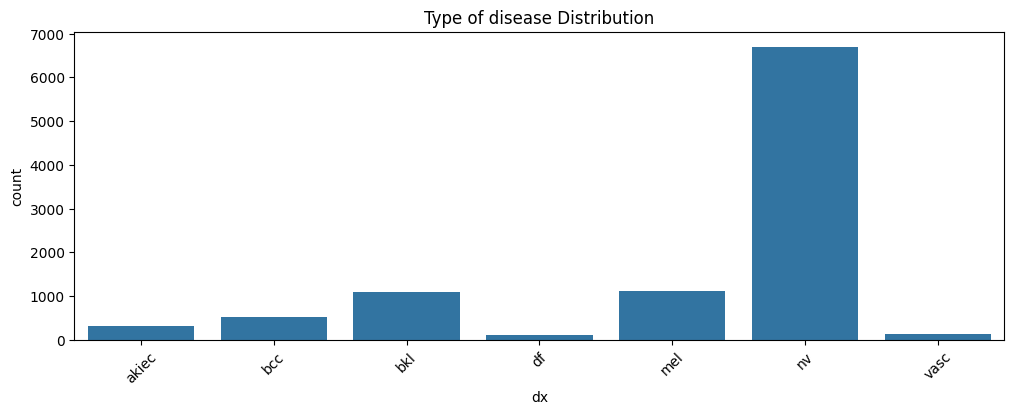

In [68]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', order=['akiec','bcc','bkl','df','mel','nv','vasc'])
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [329]:
monotonocity_intgrad_50

[0.13156752062527138,
 0.31762917933130697,
 0.5893399913156753,
 0.22253582283977422,
 0.29027355623100304,
 0.030829353017802867,
 0.2687798523664785,
 0.02323056882327399,
 0.5145462440295268,
 0.40110725141120274,
 -0.24750325662179765,
 0.16608771168041686,
 0.3534520191055145,
 -0.3428137212331741,
 -0.09411636995223623,
 -0.08358662613981761,
 0.2907077724706904,
 0.3076422058184976,
 -0.17140686061658705,
 0.40403821102909243,
 -0.3952453321754233,
 0.29939209726443766,
 0.06545809813287017,
 0.696699956578376,
 0.11528441163699521,
 0.5973729917498914,
 0.42455492835432046,
 0.4691706469821971,
 0.61615284411637,
 0.5077073382544507,
 -0.4331306990881459,
 0.4468085106382978]